In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv('../EDA/data.csv')
Y = pd.read_csv('../EDA/y.csv')

In [23]:
def drop_non_year_column(titles):
    # Get Years in dataset
    drops = []
    for title in titles:
        if not title.endswith("interPolation") and not column.endswith('Dummy') : drops.append(title)
    return drops

In [25]:
X_without = dataset.drop(columns=["year","country"], axis=0)

In [26]:
dataset = dataset.merge(Y, how='left', on=["year","country"])

In [27]:
X_without = X_without.drop(columns=drop_non_year_column(X_without.columns), axis=0)

In [28]:
X_without = X_without.fillna(0)

In [29]:
for column in X_without.columns:
    if not column.endswith('Dummy') or not column.endswith('growth') or not column.endswith('PercentageGrowth'):
        X_without[column+'-growth'] = X_without[column].rolling(window=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
        X_without[column+'-PercentageGrowth'] = X_without[column].rolling(window=2).apply(lambda x: ((x.iloc[-1] - x.iloc[0])/x.iloc[0]))

In [30]:
X_without = X_without.fillna(0)
X_without = X_without.replace(np.inf, 0)

In [18]:
bigNumbers = X_without.max()[X_without.max() > 10000000].keys()
for bigColumn in bigNumbers:
    X_without[bigColumn+"log"] = np.log10(X_without[bigColumn])

X_without = X_without.drop(columns=bigNumbers, axis=0)

In [19]:
X_without = X_without.fillna(0)

In [32]:
X_without = X_without.replace(np.inf, 0)
X_without = X_without.replace(-np.inf, 0)

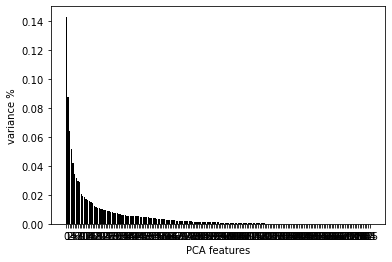

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [63]:
np.sum(pca.explained_variance_ratio_[:11])

0.5519289412205441

In [40]:
from sklearn.manifold import TSNE
tSNE = TSNE(n_components=3)
tSNE_COMPS = tSNE.fit_transform(PCA_components)

tSNE_PCA_components = pd.DataFrame(tSNE_COMPS)

In [76]:
from sklearn.manifold import TSNE
tSNE = TSNE(n_components=3)
tSNE_COMPS = tSNE.fit_transform(X)

tSNE_components = pd.DataFrame(tSNE_COMPS)

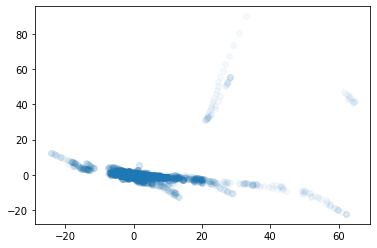

In [53]:
plt.scatter(PCA_components[0], PCA_components[3], alpha=.04)
plt.show()

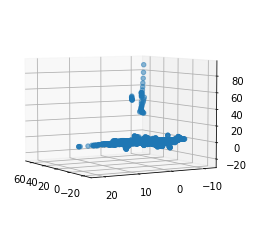

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[1], PCA_components[3], alpha=.5)
ax.view_init(elev=5., azim=150)

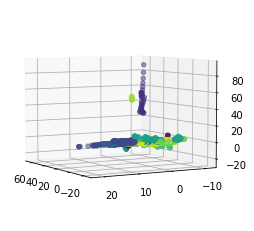

In [72]:
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D

components = 15
features = 11

gmm = mixture.GaussianMixture(n_components=components, covariance_type='full')
labels = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["gmmLabels-"+str(components)+str(features)] = labels

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[1], PCA_components[3], c=labels, alpha=.5)
ax.view_init(elev=5., azim=150)

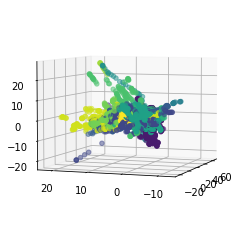

In [75]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[2], PCA_components[4], c=labels, alpha=.5)
ax.view_init(elev=5., azim=200)

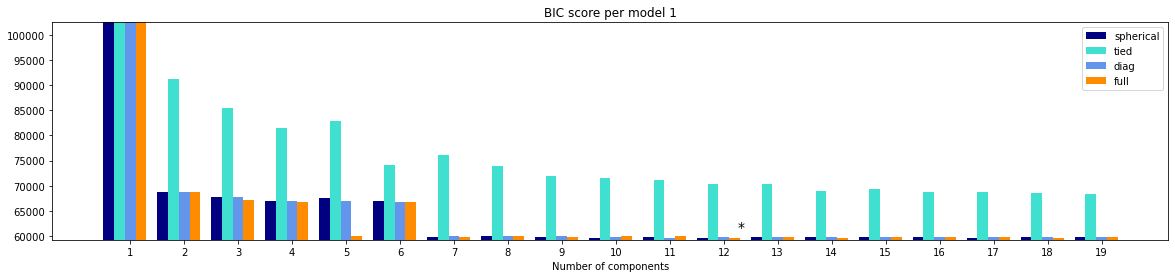

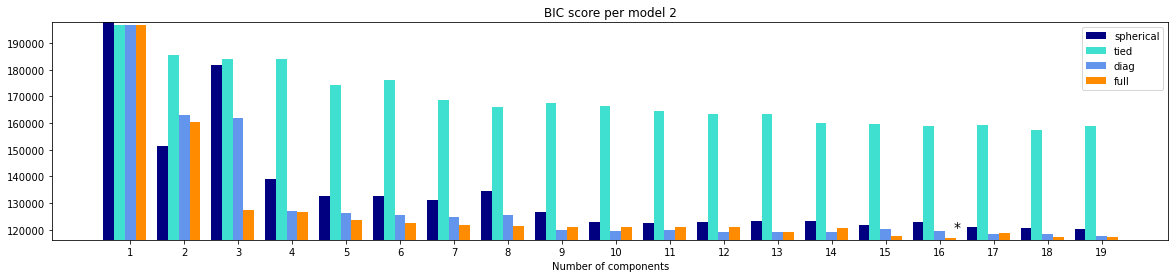

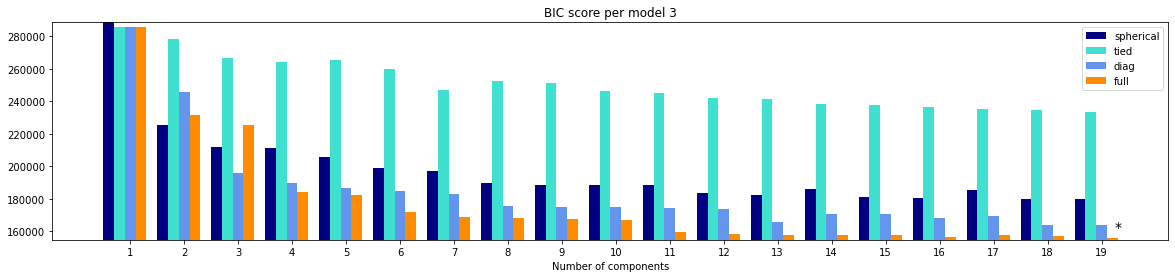

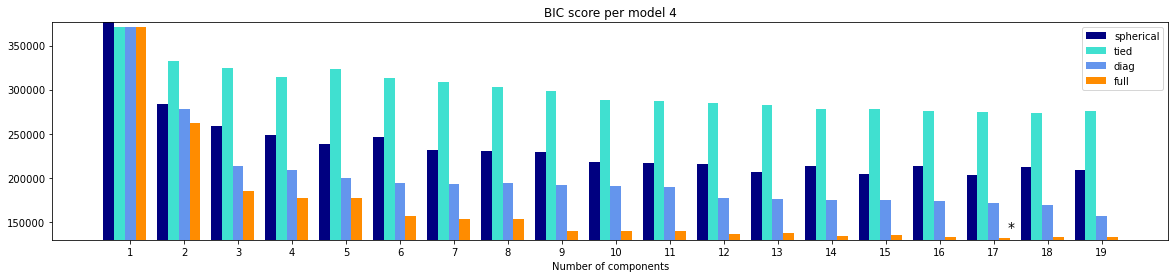

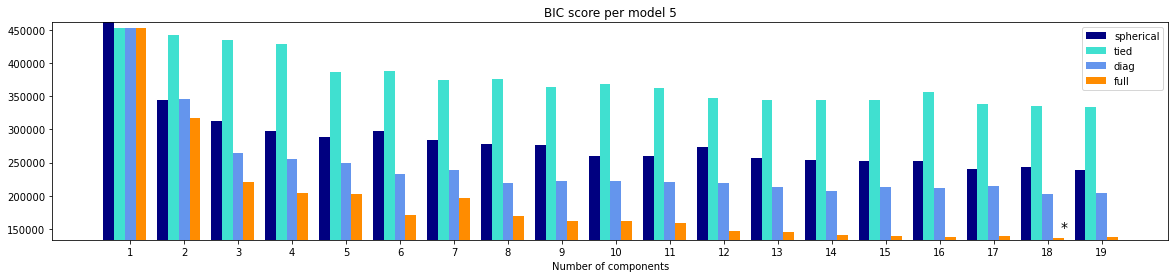

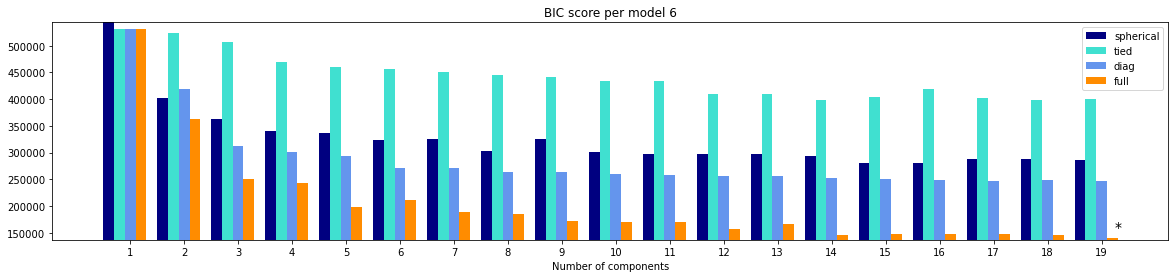

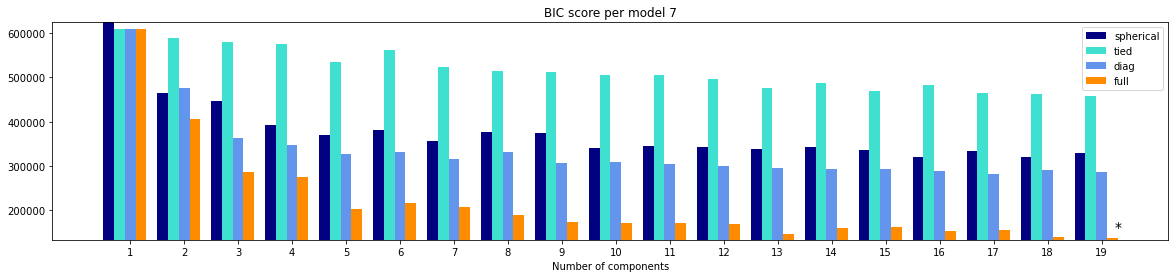

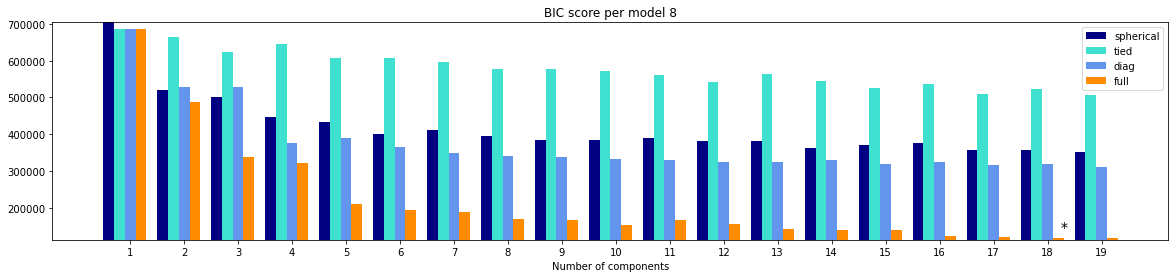

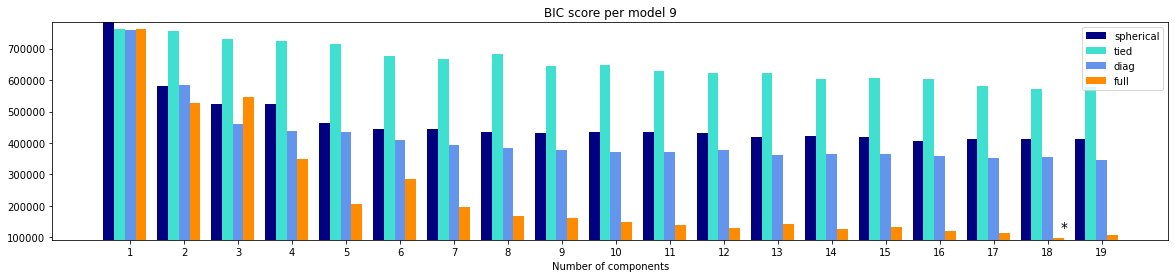

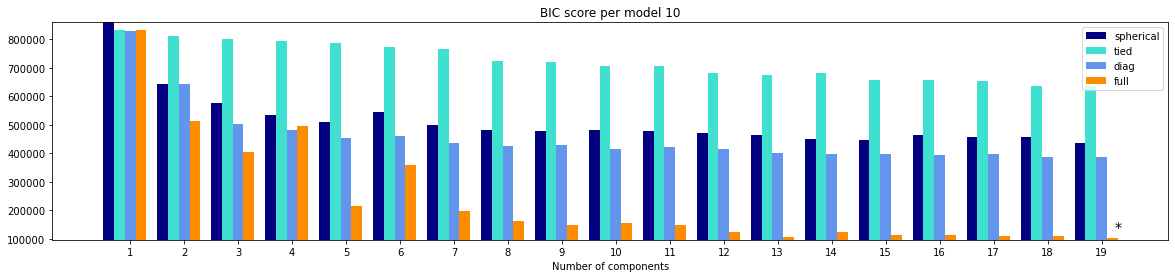

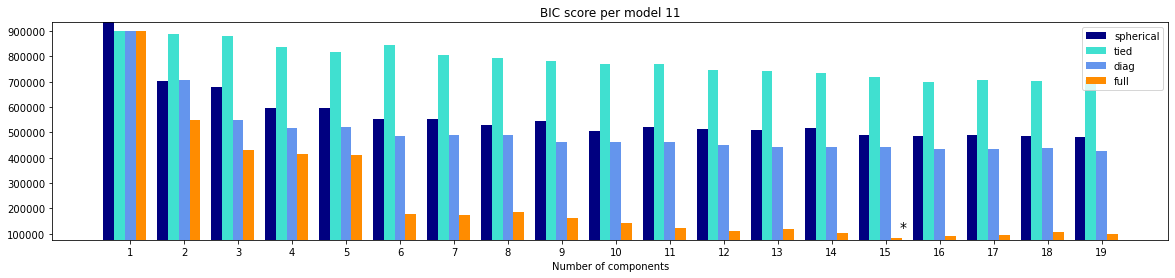

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


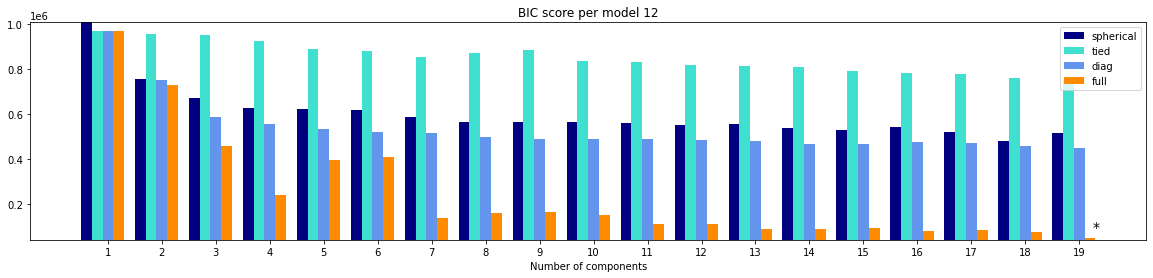

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


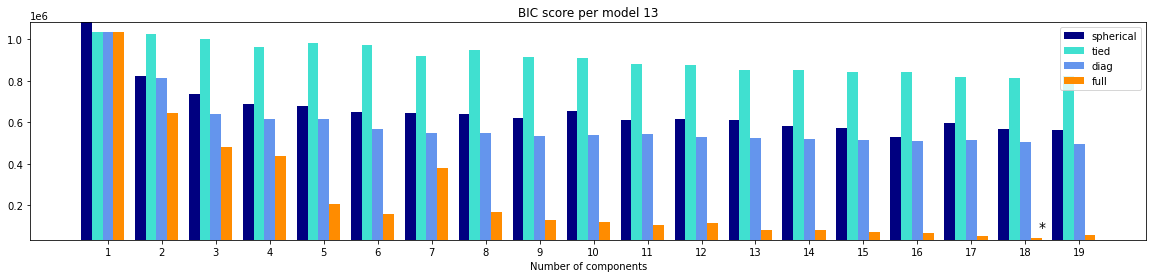

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


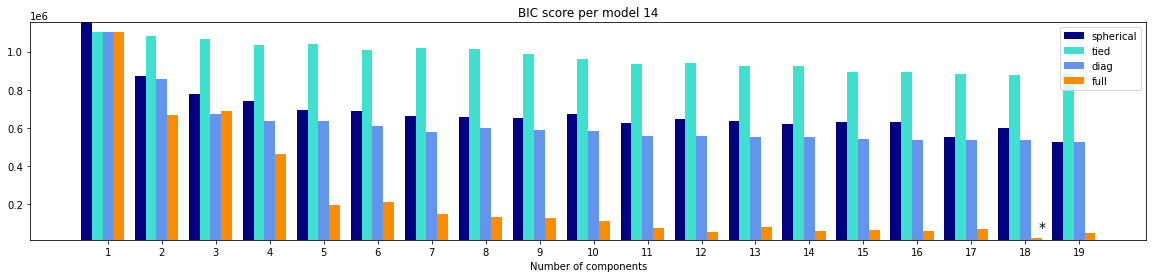

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


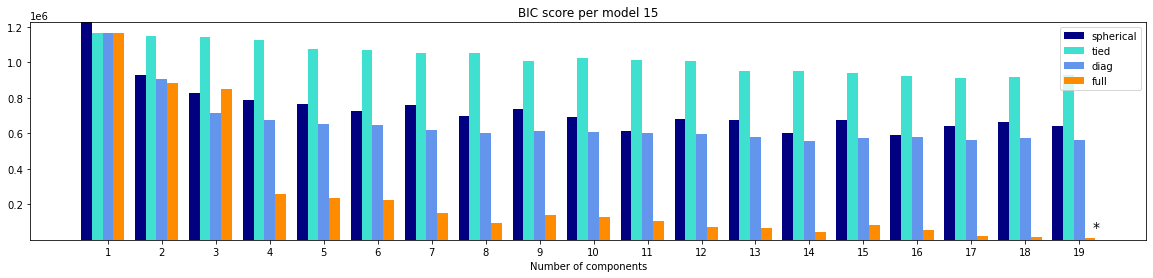

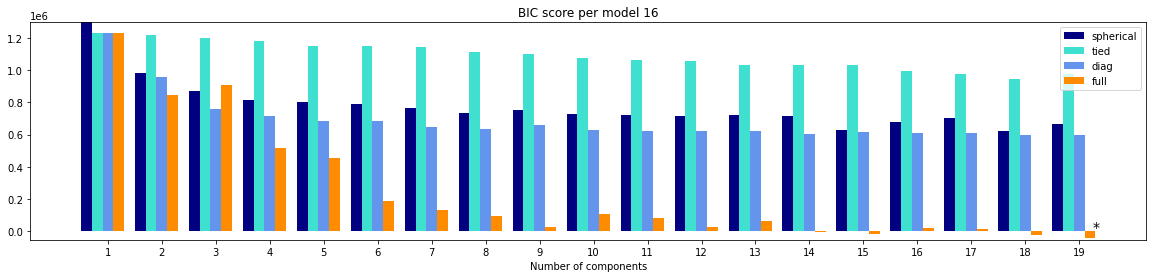

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


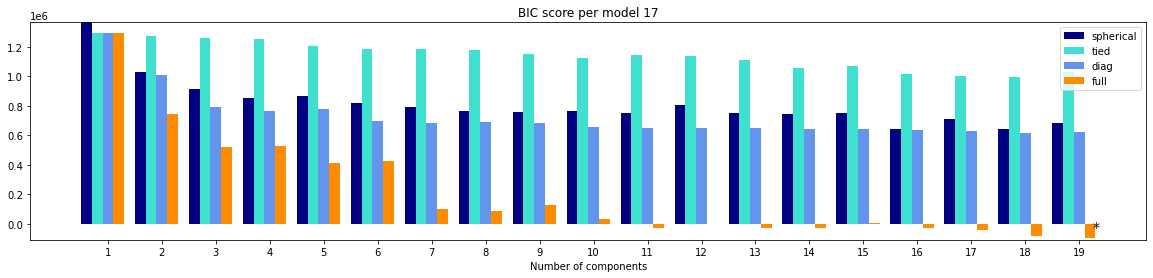

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


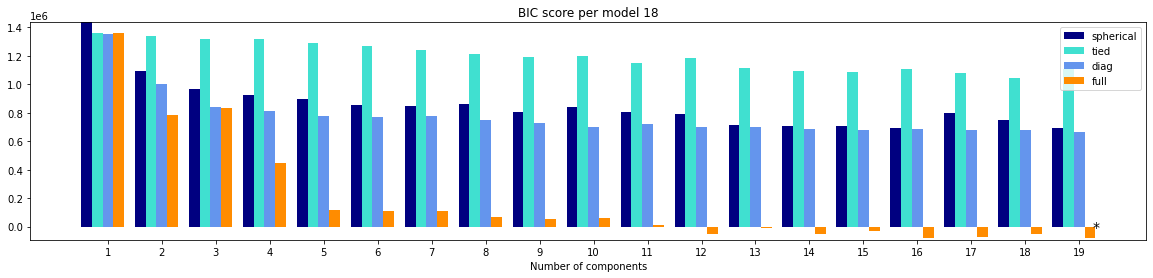

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge

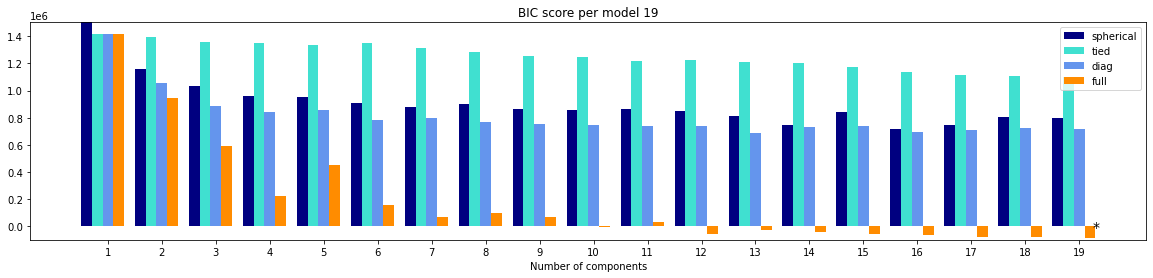

In [62]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import mixture

for features in range(1,20):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    cv_types = ["spherical", "tied", "diag", "full"]
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(
                n_components=n_components, covariance_type=cv_type
            )
            gmm.fit(PCA_components.iloc[:,:features])
            bic.append(gmm.bic(PCA_components.iloc[:,:features]))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(20, 4))
    spl = plt.subplot(1, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + 0.2 * (i - 2)
        bars.append(
            plt.bar(
                xpos,
                bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
                width=0.2,
                color=color,
            )
        )
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
    plt.title("BIC score per model " +str(features))
    xpos = (
        np.mod(bic.argmin(), len(n_components_range))
        + 0.65
        + 0.2 * np.floor(bic.argmin() / len(n_components_range))
    )
    plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
    spl.set_xlabel("Number of components")
    spl.legend([b[0] for b in bars], cv_types)
    plt.show()